In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#!pip install dltk
#install CV
#!pip install fastai
#!pip install opencv-contrib-python --upgrade
import cv2 as cv
from dltk.io.augmentation import *
from dltk.io.preprocessing import *

#image 
import matplotlib.image as mpimg

In [144]:
%matplotlib inline

# Loading and Looking at the data

In [3]:
normal=cv.imread("IM-0523-0001-0003.jpeg")
Binf=cv.imread("person3_bacteria_12.jpeg")
Vinf=cv.imread("person94_virus_176.jpeg")


Text(0.5, 1.0, 'Normal lung')

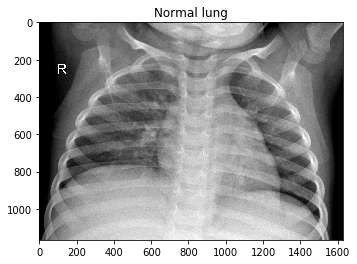

In [5]:
plt.imshow(normal)
plt.title("Normal lung")


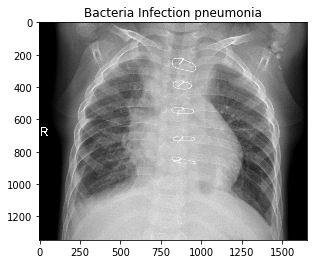

In [6]:
plt.imshow(Binf)
plt.title("Bacteria Infection pneumonia")
plt.show()

# In-depth visulisation 

Text(0.5, 1.0, 'Bad lungs (VIrus)')

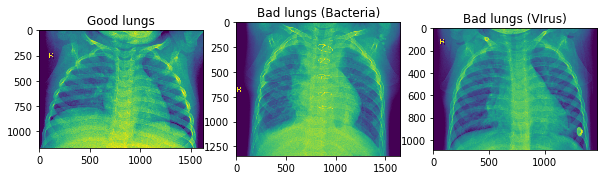

In [184]:
normal=plt.imread("IM-0523-0001-0003.jpeg")
Binf=plt.imread("person3_bacteria_12.jpeg")
Vinf=plt.imread("person94_virus_176.jpeg")

fig = plt.figure(figsize=(10, 5))

a = fig.add_subplot(131)
plt.imshow(normal)

a.set_title('Good lungs')

a = fig.add_subplot(132)
plt.imshow(Binf)
a.set_title('Bad lungs (Bacteria)')

a = fig.add_subplot(133)
plt.imshow(Vinf)
a.set_title('Bad lungs (VIrus)')


In [8]:
## preprocessing 
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

In [14]:
!pip install -q tf-nightly-2.0-preview

In [471]:
#https://www.tensorflow.org/tutorials/keras/basic_classification
#https://brohrer.github.io/how_convolutional_neural_networks_work.html
#https://pythonprogramming.net/convolutional-neural-network-deep-learning-python-tensorflow-keras/?completed=/loading-custom-data-deep-learning-python-tensorflow-keras/
#https://becominghuman.ai/detecting-pneumonia-with-deep-learning-3cf49b640c14
# https://github.com/anjanatiha/Pneumonia-Detection-from-Chest-X-Ray-Images-with-Deep-Learning/blob/master/code/Detection%20of%20Pneumonia%20from%20Chest%20X-Ray%20Images%201.0.0.3.ipynb

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [213]:
DATADIR = "C:/Users\omich\Desktop\Saraj\Week 4"

CATEGORIES = [ "PNEUMONIA", "NORMAL"]

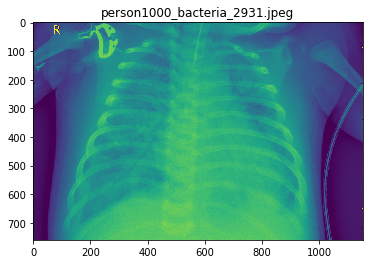

In [220]:
for category in CATEGORIES :
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path): 
        img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        
        plt.imshow(img_array) 
        plt.title(img)
        plt.show()
        break  
    break  

# Reshape Image 

In [ ]:
print(img_array.shape)

In [ ]:
img_size= 200
new_array=cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array)
print(new_array.shape)

# Building our training data

In [260]:
training = []
def create_train():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num =CATEGORIES.index(category)
        for img in os.listdir(path): 
            try:
                img_array = cv2.imread( os.path.join(path,img),cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (img_size, img_size))
                training.append([new_array,class_num])
            except  Exception as e:
                pass
       
create_train()
print(len(training))

5216


In [427]:
training[4]

[array([[26, 29, 37, ...,  0,  0,  0],
        [28, 36, 41, ...,  1,  0,  0],
        [33, 40, 43, ...,  5,  3,  1],
        ...,
        [58, 27, 29, ..., 35, 35, 35],
        [33, 26, 29, ..., 35, 35, 35],
        [40, 25, 29, ..., 35, 35, 33]], dtype=uint8), 0]

In [374]:
import random 
random.shuffle(training)

In [378]:
for sample in training[:10]:
    print(sample[1])

0
0
0
0
1
1
0
0
0
1


In [379]:
training[4]

[array([[82, 87, 89, ..., 52, 57, 53],
        [79, 82, 90, ..., 61, 61, 65],
        [73, 85, 87, ..., 69, 71, 72],
        ...,
        [ 0,  0,  0, ..., 30, 16,  0],
        [ 0,  0,  0, ..., 29, 15,  0],
        [ 0,  0,  0, ..., 29, 12,  0]], dtype=uint8), 1]

In [411]:
X = []
y = []

for features,label in training:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, img_size, img_size, 1))

X = np.array(X).reshape(-1, img_size, img_size, 1)

[[[[26]
   [ 6]
   [ 9]
   ...
   [14]
   [16]
   [16]]

  [[17]
   [ 6]
   [12]
   ...
   [15]
   [15]
   [15]]

  [[15]
   [ 8]
   [17]
   ...
   [12]
   [14]
   [14]]

  ...

  [[39]
   [38]
   [28]
   ...
   [31]
   [26]
   [26]]

  [[39]
   [38]
   [28]
   ...
   [31]
   [26]
   [26]]

  [[37]
   [35]
   [28]
   ...
   [31]
   [26]
   [26]]]]


In [412]:
X

array([[[[ 26],
         [  6],
         [  9],
         ...,
         [ 14],
         [ 16],
         [ 16]],

        [[ 17],
         [  6],
         [ 12],
         ...,
         [ 15],
         [ 15],
         [ 15]],

        [[ 15],
         [  8],
         [ 17],
         ...,
         [ 12],
         [ 14],
         [ 14]],

        ...,

        [[ 39],
         [ 38],
         [ 28],
         ...,
         [ 31],
         [ 26],
         [ 26]],

        [[ 39],
         [ 38],
         [ 28],
         ...,
         [ 31],
         [ 26],
         [ 26]],

        [[ 37],
         [ 35],
         [ 28],
         ...,
         [ 31],
         [ 26],
         [ 26]]],


       [[[ 39],
         [ 42],
         [ 46],
         ...,
         [ 68],
         [ 69],
         [ 62]],

        [[ 39],
         [ 46],
         [ 51],
         ...,
         [ 74],
         [ 72],
         [ 70]],

        [[ 43],
         [ 50],
         [ 54],
         ...,
         [ 77],
         [

#  Saving The Data


In [413]:
# saveing the data
import pickle


In [414]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [429]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# CNN (Convolutional Neural Networks)

In [428]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [468]:
X = X/255.0

In [470]:
model = Sequential()